<h1>Extracting Stock Data Using a Python Library</h1>


In [ ]:
!pip install yfinance
!pip install matplotlib
#!pip install pandas==1.3.3

In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")
#apple.info
apple_data = apple.history(period="max")
apple_data.reset_index(inplace=True)
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,0.0,0.0


Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

### Stock Info
Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [7]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [6]:
apple_info['country']

'United States'

In [8]:
apple_info['grossProfits']

152836000000

### Extracting Share Price
A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [12]:
apple_data = apple.history(period="max")
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [13]:
apple_data.reset_index(inplace=True)
apple_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,0.0,0.0


We can plot the `Open` price against the `Date`:


<Axes: title={'center': 'Apple Open Price History'}, xlabel='Date'>

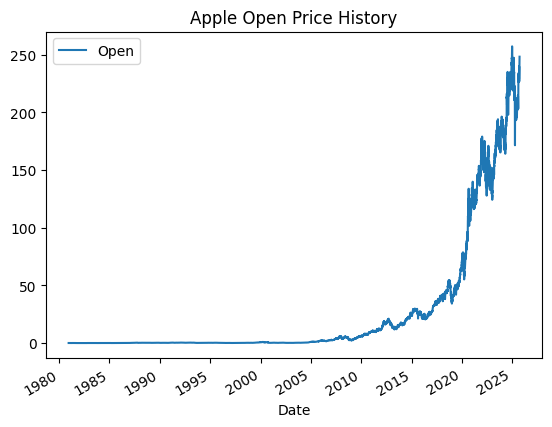

In [15]:
apple_data.plot(x = 'Date', y = 'Open', title = 'Apple Open Price History')

### Extracting Dividends
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [16]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
Name: Dividends, Length: 88, dtype: float64

We can plot the dividends overtime:


<Axes: title={'center': 'Apple Dividends History'}, xlabel='Date'>

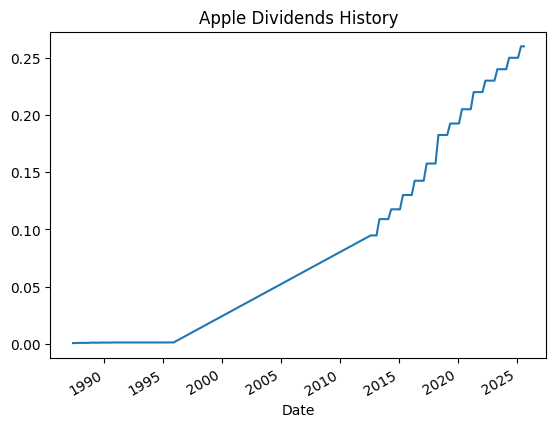

In [17]:
apple.dividends.plot(title = 'Apple Dividends History')

## Exercise 
Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [18]:
amd = yf.Ticker('AMD')
amd_info = amd.info
amd_info

{'address1': '2485 Augustine Drive',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95054',
 'country': 'United States',
 'phone': '408 749 4000',
 'website': 'https://www.amd.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. It operates in three segments: Data Center, Client and Gaming, and Embedded. The company offers artificial intelligence (AI) accelerators, x86 microprocessors, and graphics processing units (GPUs) as standalone devices or as incorporated into accelerated processing units, chipsets, and data center and professional GPUs; and embedded processors and semi-custom system-on-chip (SoC) products, microprocessor and SoC development services and technology, data processing units, field programmable gate arrays (FPGA), system on modules,

In [21]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    print("Type:", type(amd_info))
amd_info

Type: <class 'dict'>


{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [22]:
amd_info['country']

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [23]:
amd_info['sector']

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [30]:
amd_data = amd.history(period = 'max')
amd_data.reset_index(inplace=True)
print(amd_data.loc[0, 'Volume'])
amd_data.head()

219600


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,3.125000,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,3.125000,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,3.031250,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,3.041667,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,3.010417,3.020833,2.906250,2.916667,130800,0.0,0.0
